In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]= '2'

In [2]:
%matplotlib inline

import sys
sys.path.append("../../")

from train_model_norm import train

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot, PredictionError

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0

2023-08-22 00:09:09.803331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
hyperparameter={
"num_nearest":60,
"sigma":10,
"learning_rate":0.008,
"batch_size":250,
"num_neuron":15,
"num_layers":2,
"size_embedded":50,
"num_nearest_geo":30,
"num_nearest_eucli":30,
"id_dataset":'poa',
"epochs":300,
"optimier":'adam',
"validation_split":0.1,
"label":'asi_poa',
"early_stopping": False,
"graph_label":'matrix',
}

# Model

In [4]:
spatial = train(**hyperparameter)

In [5]:
dataset,\
result,\
fit,\
embedded_train,\
embedded_test,\
predict_regression_train,\
predict_regression_test = spatial()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-08-22 00:09:11.234808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-22 00:09:11.238779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-22 00:09:11.239038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-22 00:09:11.239743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operation

Epoch 1/300


2023-08-22 00:09:13.457467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-22 00:09:13.460931: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6f58014530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-22 00:09:13.460970: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-08-22 00:09:13.466554: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-22 00:09:13.558079: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31/45 [===================>..........] - ETA: 0s - loss: 5.5676 - root_mean_squared_error: 7.1650   
Epoch 1: val_loss improved from inf to 0.55109, saving model to /disk1/jupyter/smhan/ASI-revised/output/models/poa/asi_poa_weights.hdf5
45/45 [==============================] - 2s 7ms/step - loss: 4.1391 - root_mean_squared_error: 6.0274 - val_loss: 0.5511 - val_root_mean_squared_error: 0.7324 - lr: 0.0080
Epoch 2/300
45/45 [==============================] - ETA: 0s - loss: 0.2420 - root_mean_squared_error: 0.3729
Epoch 2: val_loss improved from 0.55109 to 0.14807, saving model to /disk1/jupyter/smhan/ASI-revised/output/models/poa/asi_poa_weights.hdf5
45/45 [==============================] - 0s 4ms/step - loss: 0.2420 - root_mean_squared_error: 0.3729 - val_loss: 0.1481 - val_root_mean_squared_error: 0.2149 - lr: 0.0080
Epoch 3/300
31/45 [===================>..........] - ETA: 0s - loss: 0.1238 - root_mean_squared_error: 0.1809
Epoch 3: val_loss improved from 0.14807 to 0.10032, saving 

Epoch 24/300
44/45 [============================>.] - ETA: 0s - loss: 0.0579 - root_mean_squared_error: 0.0715
Epoch 24: val_loss improved from 0.02998 to 0.02425, saving model to /disk1/jupyter/smhan/ASI-revised/output/models/poa/asi_poa_weights.hdf5
45/45 [==============================] - 0s 5ms/step - loss: 0.0577 - root_mean_squared_error: 0.0713 - val_loss: 0.0243 - val_root_mean_squared_error: 0.0366 - lr: 0.0080
Epoch 25/300
45/45 [==============================] - ETA: 0s - loss: 0.0577 - root_mean_squared_error: 0.0738
Epoch 25: val_loss did not improve from 0.02425
45/45 [==============================] - 0s 4ms/step - loss: 0.0577 - root_mean_squared_error: 0.0738 - val_loss: 0.0928 - val_root_mean_squared_error: 0.1004 - lr: 0.0080
Epoch 26/300
31/45 [===================>..........] - ETA: 0s - loss: 0.0895 - root_mean_squared_error: 0.1052
Epoch 26: val_loss did not improve from 0.02425
45/45 [==============================] - 0s 4ms/step - loss: 0.0790 - root_mean_square

Epoch 46/300
45/45 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.0164
Epoch 46: val_loss improved from 0.00804 to 0.00761, saving model to /disk1/jupyter/smhan/ASI-revised/output/models/poa/asi_poa_weights.hdf5
45/45 [==============================] - 0s 4ms/step - loss: 0.0072 - root_mean_squared_error: 0.0164 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0188 - lr: 8.0000e-04
Epoch 47/300
32/45 [====================>.........] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0152
Epoch 47: val_loss did not improve from 0.00761
45/45 [==============================] - 0s 4ms/step - loss: 0.0075 - root_mean_squared_error: 0.0165 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0191 - lr: 8.0000e-04
Epoch 48/300
31/45 [===================>..........] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.0146
Epoch 48: val_loss did not improve from 0.00761
45/45 [==============================] - 0s 4ms/step - loss: 0.0071 - root_mea

45/45 [==============================] - 0s 5ms/step - loss: 0.0056 - root_mean_squared_error: 0.0150 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0179 - lr: 8.0000e-06
Epoch 69/300
45/45 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0150
Epoch 69: val_loss did not improve from 0.00633
45/45 [==============================] - 0s 4ms/step - loss: 0.0056 - root_mean_squared_error: 0.0150 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0179 - lr: 8.0000e-06
Epoch 70/300
45/45 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0150
Epoch 70: val_loss improved from 0.00633 to 0.00632, saving model to /disk1/jupyter/smhan/ASI-revised/output/models/poa/asi_poa_weights.hdf5
45/45 [==============================] - 0s 4ms/step - loss: 0.0056 - root_mean_squared_error: 0.0150 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0179 - lr: 8.0000e-06
Epoch 71/300
31/45 [===================>..........] - ETA: 0s

In [6]:
print('################# Test ##########################')
print('MALE test:.... {}'.format(result[0]))
print('RMSE test:.... {}'.format(result[1]))
print('MAPE test:.... {}'.format(result[2]))
print('################# Train ##########################')
print('MALE train:.... {}'.format(result[3]))
print('RMSE train:.... {}'.format(result[4]))
print('MAPE train:.... {}'.format(result[5]))

################# Test ##########################
MALE test:.... 0.00787828664993379
RMSE test:.... 8129.2359054432145
MAPE test:.... 0.5405497494989258
################# Train ##########################
MALE train:.... 0.005641472055938552
RMSE train:.... 6178.688696982488
MAPE train:.... 0.33485315377197045


In [7]:
from sklearn.metrics import r2_score
import numpy as np

# metric
def metric(pred, label):
    assert label.shape == pred.shape
    
    with np.errstate(divide = 'ignore', invalid = 'ignore'):
        mask = np.not_equal(label, 0)
        mask = mask.astype(np.float32)
        mask /= np.mean(mask)
        male = np.abs(np.subtract(np.log(pred), np.log(label))).astype(np.float32)
        male = np.nan_to_num(male * mask)
        male = np.mean(male)
        mae = np.abs(np.subtract(pred, label)).astype(np.float32)
        rmse = np.square(mae)
        mape = np.divide(mae, label)
        mae = np.nan_to_num(mae * mask)
        mae = np.mean(mae)
        rmse = np.nan_to_num(rmse * mask)
        rmse = np.sqrt(np.mean(rmse))
        mape = np.nan_to_num(mape * mask)
        mape = np.median(mape) # np.mean(mape) -- author leverages median
    return male, rmse, mape



In [8]:
y_label = np.exp(dataset.y_test)
y_pred = np.exp(result[6].flatten())
metric(y_pred, y_label) # should be same value

(0.007878287, 8129.236, 0.0054054974949899765)

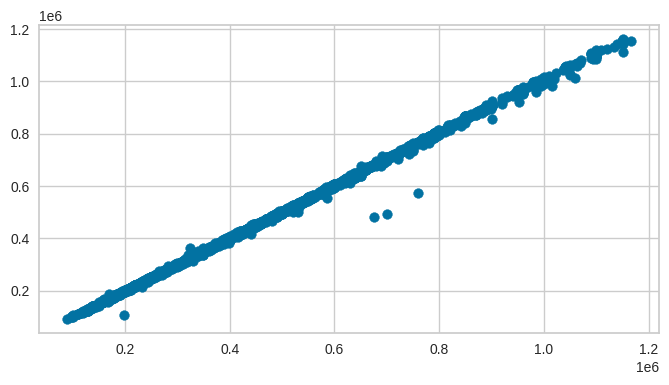

In [9]:
plt.scatter(y_label, y_pred)